In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(1367, 1025, 3)


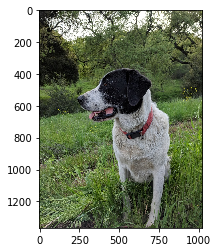

In [11]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

plt.imshow(full)
print(full.shape)

(375, 486, 3)


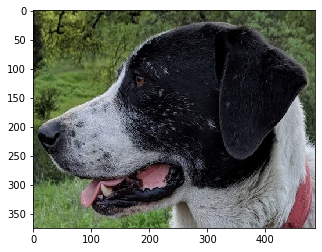

In [13]:
target = cv2.imread('../DATA/sammy_face.jpg')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

plt.imshow(target)
print(target.shape)

In [14]:
sum([1,2,3])

6

In [16]:
mystring = 'sum'

eval(mystring)

<function sum(iterable, start=0, /)>

In [17]:
myFunc = eval('sum')

myFunc([1,2])

3

In [18]:
eval("1+1")

2

## All 6 methods for comparison

In [19]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

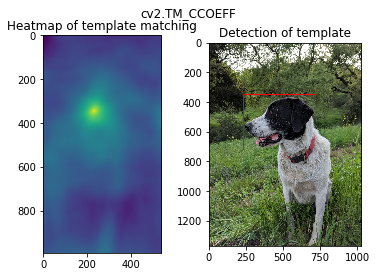

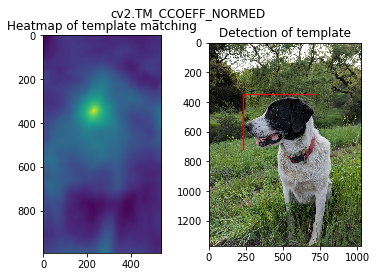

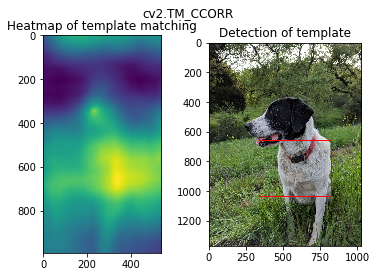

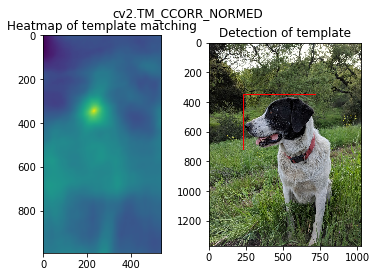

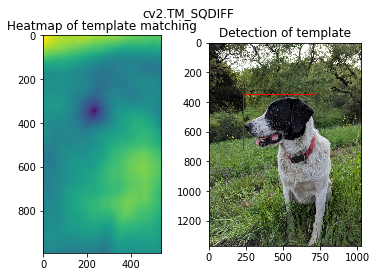

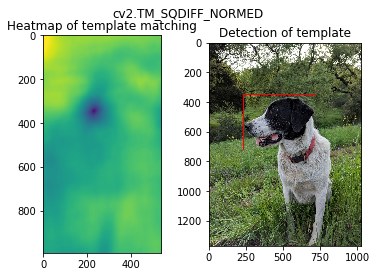

In [25]:
for m in methods:
    
    # Create a copy
    full_copy = full.copy()
    
    method = eval(m)
    
    # Template matching
    res = cv2.matchTemplate(full_copy, target, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:

        topLeft = min_loc
        
    else:
        
        topLeft = max_loc
        
    height, width, channels = target.shape
    
    bottom_right = (topLeft[0] + width, topLeft[1] + height)
    
    cv2.rectangle(full_copy, topLeft, bottom_right, (255,0,0), thickness=4)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    
    #Title of the method used
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')

(993, 540)


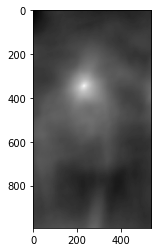

In [23]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full_copy, target, my_method)
print(res.shape)
plt.imshow(res, cmap='gray')